In [1]:
import numpy as np
import neuralNetwork as nn
import learningFunctions as lnf
import errorFunctions as errfun
import activationFunctions as actfun
import datasets as ds
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#Costruzione path del dataset
current_path = os.getcwd()
data_path = os.path.join(current_path, 'Data')
train_file_path = os.path.join(data_path, "mnist_train.csv")
test_file_path = os.path.join(data_path, "mnist_test.csv")

In [3]:
#Lettura csv con pandas
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [4]:
#Ottenimento array per il training e il testing
train_array = np.array(train_data)
test_array = np.array(test_data)

In [5]:
#Estrapoliamo il numero di righe e di colonne di train e test
m, n = train_array.shape 
mtest, ntest = test_array.shape  

#Mescola casualmente i dati prima di suddividerli in set di sviluppo e training
np.random.shuffle(train_array)  

In [6]:
#Calcolo percentuale dati per il validation set
val_percentage = 0.20
val_index = int(np.ceil(m * val_percentage))

#Distribuzione training, validation e test set
Xval, Yval = ds.get_mnist_validation(train_array, n, val_index)
Xtrain, Ytrain = ds.get_mnist_training(train_array, n, m, val_index)
Xtest, Ytest = ds.get_mnist_testing(test_array, ntest, mtest)
print(Xtrain.shape, Ytrain.shape, Xval.shape, Yval.shape, Xtest.shape, Ytest.shape)

(784, 47999) (10, 47999) (784, 11999) (10, 11999) (784, 9999) (10, 9999)


In [7]:
#Creazione rete neurale
#Assegnazione funzioni di attivazione per ogni strato della rete
hidden_activation_functions = [actfun.leaky_relu, actfun.leaky_relu, actfun.leaky_relu, actfun.leaky_relu, actfun.leaky_relu]
#Assegnazione numero di neuroni per ogni strato
hidden_layers = [50, 50, 50, 50, 50]
#Assegnazione della funzione di attivazione e di errore per l'ultimo strato della rete
output_activation_function = actfun.identity
error_function = errfun.cross_entropy_softmax
#Estrazione input e target
input_layer_size = Xtrain.shape[0]
output_layer_size = Ytrain.shape[0]
network = nn.NeuralNetwork(hidden_activation_functions, output_activation_function, error_function,
                input_layer_size, hidden_layers, output_layer_size)


In [8]:
#Copia la rete principale in una per il training
training_net=lnf.duplicate_network(network)
lnf.get_net_structure(training_net,show=1)

num_hidden_layers:  5
input_size:  784
output_size:  10
neurons in hidden layers:
100
100
100
100
100
activation functions:
leaky_relu
leaky_relu
leaky_relu
leaky_relu
leaky_relu
identity
error_function: cross_entropy_softmax


In [9]:
#batch training
err,errV=lnf.train_neural_network(training_net,Xtrain,Ytrain,Xval,Yval,max_epochs=150,learning_rate=0.00001)

Epoch: 0, Train Error: 112044.54524554395, Train Accuracy: 0.10779391237317444, Val Error: 27959.846566922854, Val Accuracy: 0.10859238269855821


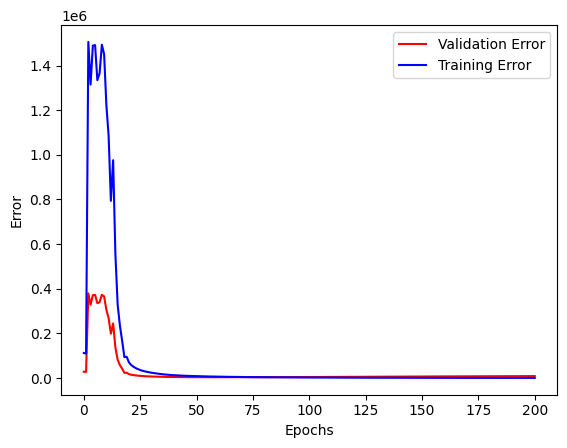

In [10]:
#Stampa grafico dell'errore ottenuto attraverso il training
plt.figure()
plt.plot(errV, 'r', label='Validation Error')
plt.plot(err, 'b', label='Training Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [11]:
#Stampa accuracy per training e test set
acc=lnf.netAccuracy(training_net,Xtest,Ytest)
print('test accuracy: ',acc)
acc=lnf.netAccuracy(training_net,Xtrain,Ytrain)
print('train accuracy: ',acc)

test accuracy:  0.9292929292929293
train accuracy:  0.967853496947853


y_net: [[2.25235932e-44]
 [1.21894831e-14]
 [3.95627728e-21]
 [1.00000000e+00]
 [1.04701918e-31]
 [5.14875513e-65]
 [5.07823568e-30]
 [1.56511575e-15]
 [1.19994158e-16]
 [1.99332331e-53]]
y_net_trained: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


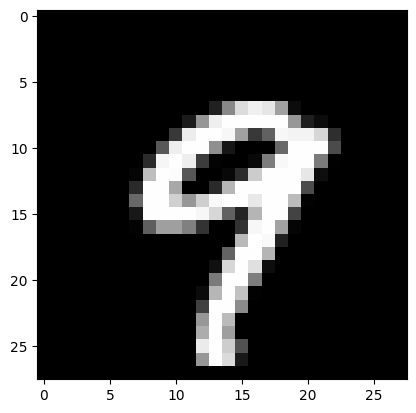

In [21]:
#Predizione rete senza addestramento e rete addestrata
x = 8898
lnf.test_prediction(network, training_net, x, Xtest)